<a href="https://colab.research.google.com/github/AIInspire/PediaGuide-chatbot/blob/main/DataPreparation_BabyCare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing data and the essential libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np
import pandas as pd
import spacy

df = pd.read_csv("/content/DS-CV01.csv")
df.head()

,Questions,Answers
0,1-week-old baby development,You and baby are getting settled in at home an...
1,1-week-old baby food,Breastfeeding: A one-week-old baby is feeding ...
2,Newborn feeding schedule,Formula-fed baby;\n2 - 3 ounces every 3 - 4 ho...
3,How much to feed my newborn baby,Formula-fed baby;\n2 - 3 ounces every 3 - 4 ho...
4,Newborn sleep schedule,Average Sleep\r\nDAYTIME SLEEP 10 hours (vario...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Questions  909 non-null    object
 1   Answers    909 non-null    object
dtypes: object(2)
memory usage: 14.3+ KB


In [ ]:
df.sample(5)

,Questions,Answers
54,Is it okay for baby to sleep on their stomach?,You should be putting baby down in the crib on...
83,What finger foods can I give my 6-month-old?,There are lots of finger foods that are safe f...
611,Amount and Schedule of Baby Formula Feedings a...,By the end of the first month: Your baby will ...
719,when to learn my baby Self-Feeding,"At twelve months, your baby was just getting u..."
616,Amount of Baby Formula Feedings at month 4,By the end of the first month: Your baby will ...


In [ ]:
df.isnull().sum()

,0
Questions,0
Answers,0


In [ ]:
print("Number of duplicated samples: ", df.duplicated().sum())

df = df.drop_duplicates()

print("Number of duplicated samples: ", df.duplicated().sum())

Number of duplicated samples:  3
Number of duplicated samples:  0


<ipython-input-7-ec1d8c27cc9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Questions_length'] = df["Questions"].apply(lambda x: len(x.split()))
<ipython-input-7-ec1d8c27cc9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['answers_length'] = df["Answers"].apply(lambda x: len(x.split()))


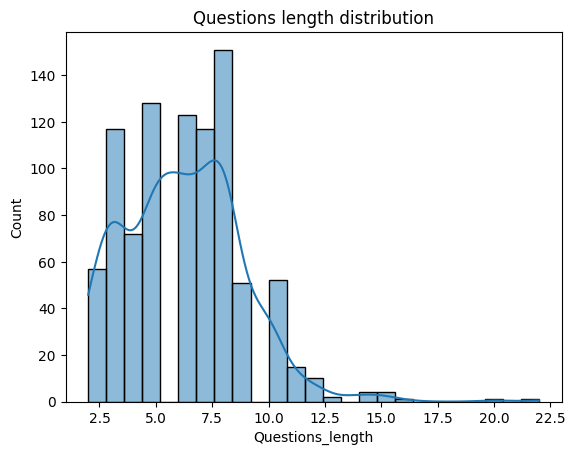

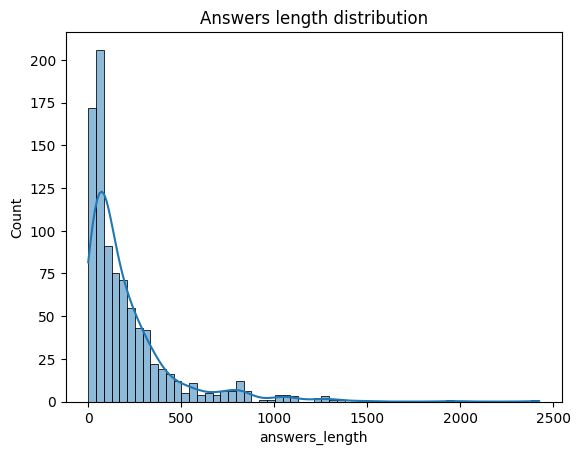

In [ ]:
df['Questions_length'] = df["Questions"].apply(lambda x: len(x.split()))
df['answers_length'] = df["Answers"].apply(lambda x: len(x.split()))


sns.histplot(df['Questions_length'], label='Questions', kde=True)
plt.title('Questions length distribution')
plt.show()

sns.histplot(df['answers_length'], label='Answers', kde=True)
plt.title('Answers length distribution')
plt.show()

In [ ]:
import re
import inflect

p = inflect.engine()

def clean_text(text):
    """
    Clean text by removing unnecessary characters and altering the format of words:

    1. remove hyphens like breast-feeding → breast feeding
    2. remove line breaks
    3. convert numbers to words

    return: cleaned text
    """
    text = re.sub(r'(\w)-(\w)', r'\1 \2', text)
    text = text.replace('\n', ' ')
    words = []
    for word in text.split():
        if word.isdigit():
            words.append(p.number_to_words(word))
        else:
            words.append(word)
    return ' '.join(words)

df['Questions'] = df['Questions'].apply(lambda x: clean_text(x))

df['Answers'] = df['Answers'].apply(lambda x: x.replace('\n', ' '))

In [ ]:
df.sample(5)

,Questions,Answers,Questions_length,answers_length
200,eleven Month Old Baby Checklist and Tips,"Schedule baby’s 12-month checkup, if you haven...",5,179
588,selecting baby wipes,Here are a some points to consider when buying...,3,375
319,nineteen Month Old Food,Your 19-month-old is getting more independent ...,2,229
373,How much should a twenty-three month old sleep?,Most 23-month-olds need around 11 to 12 hours ...,6,33
664,Tips for choosing & cooking rice for your chil...,"Keep in mind that, among different types of ri...",9,457


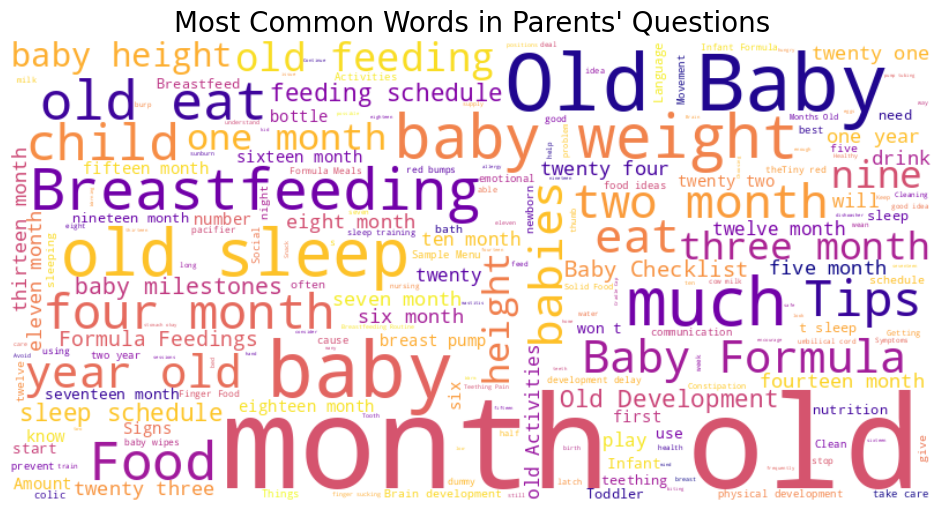

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['Questions'].tolist())

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='plasma',
    max_words=200,
    random_state=42
).generate(text)

# Display the generated image
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Parents\' Questions', fontsize=20)
plt.show()


In [ ]:
# Create a new column with the format
df['prompt'] = df['Questions'].apply(lambda x: f"Q: {x}\nA:")
df['response'] = df['Answers']

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df[['prompt', 'response']],
    test_size=0.1,
    random_state=42
)

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which 

In [ ]:
from datasets import Dataset, DatasetDict

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

dataset = DatasetDict({
  'train': train_dataset,
  'test': test_dataset
})

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
The token `iti_projects` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate w

In [ ]:
dataset.push_to_hub("omniaabdulnabi/babybot-dataset")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/omniaabdulnabi/babybot-dataset/commit/5863f20ccf0a445defe5ba61053958c112633f62', commit_message='Upload dataset', commit_description='', oid='5863f20ccf0a445defe5ba61053958c112633f62', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/omniaabdulnabi/babybot-dataset', endpoint='https://huggingface.co', repo_type='dataset', repo_id='omniaabdulnabi/babybot-dataset'), pr_revision=None, pr_num=None)